<a href="https://colab.research.google.com/github/jsleeg98/deeplearning_from_scratch/blob/main/ch4_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 데이터에서 학습한다!
데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 것을 말합니다.

2장의 퍼셉트론 예에서는 AND, OR, NAND를 진리표를 보고 직접 가중치 매개변수 값을 정해주었지만 층을 깊게 하면 정해줘야할 매개변수 개수가 매우 많아 지고 이를 정할 수 있는 경우의 수는 무수히 많아집니다. 따라서 이는 불가능 합니다.

따라서 데이터를 활용하여 이러한 매개변수를 정해주는 학습을 합니다.

## 4.1.1 데이터 주도 학습
기계학습은 데이터가 생명으로 데이터에서 답을 찾고 데이터에서 패턴을 발견하는 것입니다. 

데이터 속에서 패턴을 찾을 때 그 패턴을 사람이 찾는 것이 아니라 기계학습을 통해 이미지에서 특징(feature)을 추출하고 그 특징을 학습하는 것입니다.

## 4.1.2 훈련 데이터와 시험 데이터
기계학습 문제는 데이터를 훈련 데이터(training data)와 시험 데이터(test data)로 나눠 학습과 실험을 수행하는 것이 일반적입니다.

훈련 데이터를 활용하여 학습하면서 최적의 매개 변수를 찾고, 시험 데이터를 활용하여 훈련한 모델의 실력을 평가하는 것입니다.

**최종적으로 한번도 보지 못한 데이터로도 문제를 올바르게 풀어내는 것이 모델의 성능이라고 할 수 있습니다.(범용 능력)**



# 손실 함수
손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표입니다. 신경망은 손실 함수가 최소가 되는 방향으로 학습이 됩니다.



## 4.2.1 평균 제곱 오차(Mean Squared Error, MSE)
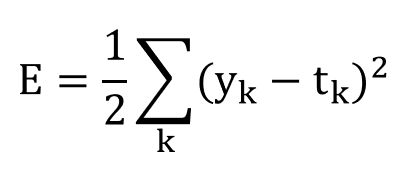
* $y_i$는 정답 레이블, $\hat{y_i}$은 예측 레이블
* 정답 레이블은 원-핫 인코딩(one-hot encoding) 방식으로 표현된다. (예) 5개 중에 2번이 정답인 경우 [0, 0, 1, 0, 0] (인덱스는 0부터 시작)
* 예측 레이블은 소프트맥스 함수를 활용하여 각 레이블에 대한 확률값으로 출력 (예) 5개 중에 2번이 정답을 확률이 제일 높은 경우 [0.1, 0.2, 0.5, 0.1, 0.1]
* 1/2를 곱하는 이유는 정답 레이블은 원-핫 인코딩이고 예측 레이블은 소프트맥스 함수를 통해 나오는 값이기 때문에 제곱 오차를 통해 나올 수 있는 값은 0~2 사이이고 이를 2로 나누어 정규화해주는 것이다.

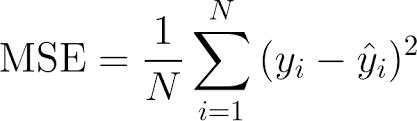
* 일반적인 평균 제곱 오차는 다음과 같다.
* $y_i$는 정답 레이블, $\hat{y_i}$은 예측 레이블, $N$은 레이블의 수
* 정답 레이블은 원-핫 인코딩(one-hot encoding) 방식으로 표현된다. (예) 5개 중에 2번이 정답인 경우 [0, 0, 1, 0, 0] (인덱스는 0부터 시작)


다음은 평균 제곱 오차 구현과 예시입니다.

In [ ]:
import numpy as np

def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
# 0~9까지의 숫자 중 정답이 '2'인 경우의 정답 레이블
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예시 1 : '2'일 확률이 가장 높다고 추정한 예측 레이블
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

# 예시 2 : '7'일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))


0.09750000000000003
0.5975


위의 결과를 보면 당연히 정답 레이블과 유사하게 예측할 수록 평균제곱오차 값이 낮고 정답 레이블과 다르게 예측하면 평균제곱오차 값이 크다는 것을 알 수 있습니다.

## 4.2.2 교차 엔트로피 오차(Cross Entropy Error)
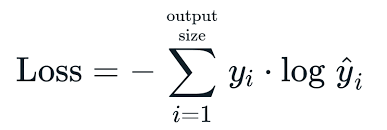
* $y_i$는 정답 레이블, $\hat{y_i}$는 예측 레이블이다.
* 정답이 아닌 경우에는 $y_i$가 0이기 때문에 결과에 영향을 주지 않고 정답인 경우 $y_i$가 1이기 때문에 $log\hat{y_i}$에 의해 결과에 영향을 준다. 그리고 $\hat{y_i}$가 1에 가까울수록 $log\hat{y_i}$가 0에 가까워지기 때문에 정답에 가까울수록 손실함수 값이 작아진다는 것을 알 수 있습니다.

다음은 교차 엔트로피 오차의 구현과 예시 입니다.

그리고 log는 특성상 0에 가까우면 -무한대에 가까워지기 때문에 이 과정에서 발생하는 오류를 방지하고나 아주 작은 값을 미리 더해줍니다.

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))

In [ ]:
# 0~9까지의 숫자 중 정답이 '2'인 경우의 정답 레이블
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예시 1 : '2'일 확률이 가장 높다고 추정한 예측 레이블
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 예시 2 : '7'일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))


0.510825457099338
2.302584092994546


위 결과를 보면 정답 레이블과 비슷하게 예측하면 교차 엔트로피 오차 값이 작고 정답 레이블과 다르게 예측하면 교차 엔트로피 오차 값이 크다는 것을 알 수 있습니다.

## 4.2.3 미니배치 학습
* 위의 예시들은 데이터 하나에 대한 정답과 예측 레이블을 통해 얻은 손실함수의 결과값이었습니다.
* 훈련 데이터 전부에 대한 손실함수의 결과 값은 훈련 데이터 N개 모두를 손실함수에 넣어 그 결과를 모두 합한 후 N으로 나누어 평균을 내어 실제 파라미터 값을 조정할 수 있도록 합니다.(다음은 교차 엔트로피 오차 손실함수를 이용하여 예시입니다.)

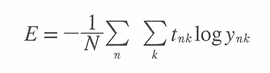
* 하지만 훈련 데이터 전부에 대해 일일이 손실 함수 결과를 구하는 것은 시간 소모가 너무 심해서 일반적으로는 일부를 골라 학습을 수행하는 '미니배치' 방식의 학습을 수행합니다.



다음은 미니배치 학습 구현입니다.

In [ ]:
!git clone https://github.com/youbeebee/deeplearning_from_scratch.git # github에서 밑바닥에서 시작하는 딥러닝 저장소 가져옴
!mv ./deeplearning_from_scratch/dataset/ ./ #dataset 폴더를 바깥으로 꺼내서 load_mnist를 사용할 수 있게 함

Cloning into 'deeplearning_from_scratch'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 58.06 MiB | 33.44 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
import sys, os
sys.path.append(os.pardir) #dataset.mnist를 사용할 수 있도록 함
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0] # 전체 훈련 데이터 개수
batch_size = 10 # 미니배치 크기
batch_mask = np.random.choice(train_size, batch_size) # 랜덤으로 미니배치 크기 만큼 전체 훈련 데이터 개수에서 랜덤한 숫자 얻기
x_batch = x_train[batch_mask] # 전체 훈련 데이터 중 랜덤하게 고른 미니배치
t_batch = t_train[batch_mask] # 전체 정답 데이터 중 랜덤하게 고른 미니배치
print(batch_mask) 
print(x_batch.shape)
print(t_batch.shape)

[30906 56194 51448 35313 33178 47411 46433 42222 45152  5130]
(10, 784)
(10, 10)


## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

다음은 원-핫 인코딩의 정답 레이블을 가지는 데이터의 구현입니다.

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1: # 데이터 하나만 들어오는 경우
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# 예시 미니배치 예측 레이블
y_batch = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.0, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.1, 0.0],
                    [0.0, 0.05, 0.0, 0.6, 0.05, 0.1, 0.0, 0.1, 0.0, 0.1],
                    [0.1, 0.05, 0.1, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.1, 0.5, 0.05, 0.2, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.6, 0.1, 0.05, 0.0, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.4, 0.2, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.5, 0.1, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.6, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.5, 0.1, 0.0, 0.0]
                    ])
print(y_batch.ndim)
print(y_batch.shape)
print(t_batch.size)
print(cross_entropy_error(y_batch, t_batch)) # 원-핫 인코딩 형식 정답 레이블의 교차 엔트로피 오차 값

2
(10, 10)
100
8.036732570348489


다음은 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어진 경우의 교차 엔트로피 오차 구현입니다.

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t]+ 1e-7)) / batch_size

In [ ]:
# 예시 미니배치 예측 레이블
y_batch = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.0, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.1, 0.0],
                    [0.0, 0.05, 0.0, 0.6, 0.05, 0.1, 0.0, 0.1, 0.0, 0.1],
                    [0.1, 0.05, 0.1, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.1, 0.5, 0.05, 0.2, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.6, 0.1, 0.05, 0.0, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.4, 0.2, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.5, 0.1, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.6, 0.1, 0.0, 0.0],
                    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.5, 0.1, 0.0, 0.0]
                    ])
t = [0, 2, 4, 3, 6, 2, 1, 2, 8, 9] # 예시 정답 레이블(숫자)

print(y_batch[np.arange(batch_size), t]) # 정답 레이블의 예측 확률만 선택함
print(np.log(y_batch[np.arange(batch_size), t] + 1e-7)) # 각각의 교차 엔트로피 오차 값 계산

print(cross_entropy_error(y_batch, t)) # 숫자 형식 정답 레이블의 교차 엔트로피 오차 값

[0.1  0.6  0.05 0.   0.   0.6  0.05 0.5  0.   0.  ]
[ -2.30258409  -0.51082546  -2.99573027 -16.11809565 -16.11809565
  -0.51082546  -2.99573027  -0.69314698 -16.11809565 -16.11809565]
7.448122513869845


## 4.2.5 왜 손실 함수를 설정하는가?
* 신경망을 학습할 때에는 미분 값을 사용하기 때문이다.
* 신경망을 학습할 때 정확도를 지표로 삼게되면 매개변수 미분이 대부분 0이 되어 학습이 진행되지 않는다.
* 신경망을 학습할 때 손실 함수를 사용하면 미분 값의 반대방향으로 매개변수를 업데이트하며 학습한다.
* 손실함수의 값은 연속적인 값으로 표현되기 때문에 각 값에 대한 미분 값도 연속적인 값으로 나온다. 정확도를 지표로 한다면 32%와 같이 불연속적인 값으로 표현되기 때문에 미분 값은 0으로 나온다.
* 같은 이유로 미분 시 연속적인 값을 가져야 학습이 원활하게 진행되기 때문에 신경망의 활성화 함수로 계단함수를 사용하지 않는다.

# 4.3 수치 미분
경사법에서는 기울기를 기준으로 나아갈 방향을 정합니다.

## 4.3.1 미분
미분은 한순간의 변화량을 표시한 것이다.

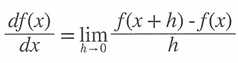
* 여기서 h를 0으로 가깝게 하게 되면 순간변화율으로 이해할 수 있습니다.

다음은 함수를 미분하는 계산을 파이썬으로 구현한 것 입니다.

In [ ]:
# 나쁜 구현 예
def numerical_diff(f, x):
  h = 10e-50
  return(f(x + h) - f(x)) / h

In [ ]:
print(np.float32(10e-50))

0.0


* 위의 구현은 나쁜 구현입니다.
  * h를 가능한 작은 값으로 하려고 했으나 반올림 오차 문제가 발생하여 너무 작은 값에 대해서는 0이 되버리는 문제가 있습니다.
  * h를 0으로 가깝게 하기가 힘들기 때문에 평균 오차율을 활용하여 순간 변화율을 구해야합니다.

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
print(np.float32(1e-4))


1e-04


## 4.3.2 수치 미분의 예
다음 수식을 미분해보겠습니다.

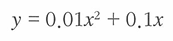



In [ ]:
def function_1(x):
  return 0.01 * x ** 2 + 0.1 * x

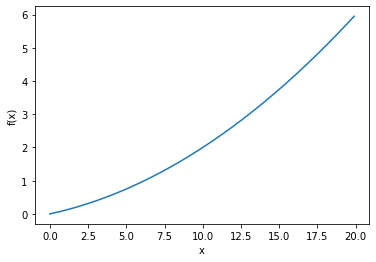

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [ ]:
# x=5에서의 미분 값
print(numerical_diff(function_1, 5))

0.1999999999990898


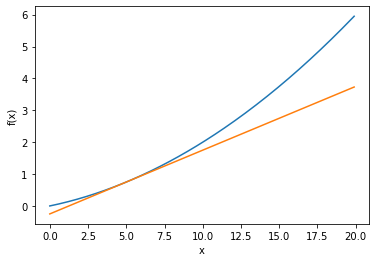

In [ ]:
# 접선의 함수를 구하는 함수
def tangent_line(f, x):
        d = numerical_diff(f, x)
        # print(d)
        y = f(x) - d*x
        return lambda t: d*t + y
tf = tangent_line(function_1, 5) # x = 5에서의 접선 함수


x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
y2 = tf(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 편미분
* 변수가 2개이상인 경우 각 변수에 따라 미분을 하는 것입니다.

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

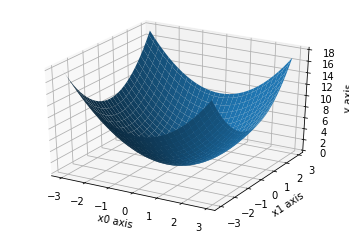

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x0 = np.arange(-3, 3, 0.1)
x1 = np.arange(-3, 3, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y = function_2(np.array([x0, x1]))
ax.set_xlabel('x0 axis')
ax.set_ylabel('x1 axis')
ax.set_zlabel('y axis')
surf = ax.plot_surface(x0, x1, y)

함수 function_2에서 x0에 대한 편미분 구하기

In [ ]:
# x0 = 3, x1 = 4일 때 x0에 대한 편미분 구하기
def function_2_tmp1(x0):
  return x0 * x0 + 4.0 ** 2

print(numerical_diff(function_2_tmp1, 3.0))

# x0 = 3, x1 = 4일때, x1에 대한 편미분 구하기
def function_2_tmp2(x1):
  return 3.0 ** 2.0 + x1 * x1

print(numerical_diff(function_2_tmp2, 4.0))

6.00000000000378
7.999999999999119


위의 결과는 
* $y = x_0^2 + x_1^2$를 $x_0$에 대해 편미분한 함수 $y = 2x_0$의 $x_0 = 3$에서의 결과 6과 거의 같다는 것을 확인할 수 있다.
* $y = x_0^2 + x_1^2$를 $x_1$에 대해 편미분한 함수 $y = 2x_1$의 $x_1 = 4$에서의 결과 8과 거의 같다는 것을 확인할 수 있다.


**결국 수치적 미분과 해석적 결과가 같이 거의 같다는 것을 의미한다.**

# 4.4 기울기(Gradient)
위에서는 각각 변수에 대한 편미분을 구했습니다. 기울기란 각각 변수에 대한 편미분을 하나의 벡터로 묶은 것을 말합니다. 


다음은 위에서 각각 편미분 값을 구했던 함수를 이용하여 기울기(Gradient)를 구하는 구현입니다.

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val # 값 복원

  return grad

In [ ]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([3.0, 4.0]))[0])
print(numerical_gradient(function_2, np.array([3.0, 4.0]))[1])

[6. 8.]
6.00000000000378
7.999999999999119


위의 결과를 보면 각각의 편미분이 하나의 벡터로 묶여 있는 것을 확인할 수 있다.

추가로 원래 6.0000--, 7.9--으로 구했던 값이 6., 8.으로 출력되는 것은 실제로는 6.000--, 7.9--이지만 보기 편하게 하기 위해서 저렇게 출력됩니다.

## 4.4.1 경사법(경사 하강법)

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x


In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

경사 하강법 시각화

In [ ]:
def show_gradient_descent(f, init_x, lr=0.01, step_num=100):
  x_ = []
  y_ = []
  z_ = []
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    x_.append(x[0])
    y_.append(x[1])
    z_.append(f(x))
  
  fig = plt.figure(figsize=(9, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(30,45)   #각 변경
  ax.scatter(x_, y_, z_)
  ax.set_zlim(-10,20)
  ax.set_xlim(-10, 10)
  ax.set_ylim(-10, 10)
  return x, f(x)

(array([-4.28174308e-05,  5.70899077e-05]), 5.092589940820891e-09)

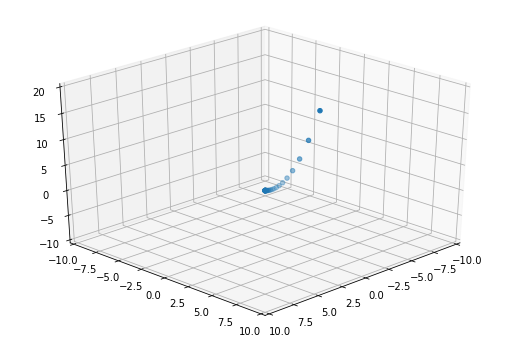

In [ ]:
init_x = np.array([-3.0, 4.0])
show_gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=50)

(array([-2.71424045,  3.61898727]), 20.464170117202002)

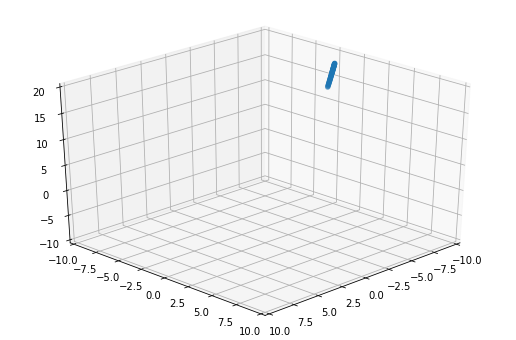

In [ ]:
init_x = np.array([-3.0, 4.0])
show_gradient_descent(function_2, init_x=init_x, lr=0.001, step_num=50)

## 4.4.2 신경망에서의 기울기

In [ ]:
!mv ./deeplearning_from_scratch/common/ ./ #common 폴더를 바깥으로 꺼내서 softmax, cross_entropy_error를 사용할 수 있게 함

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)

  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [ ]:
net = simpleNet()
print(net.W)

[[ 0.48332218  0.51853036 -0.33479158]
 [ 0.68037886  0.53964051  0.42043042]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])
net.loss(x, t)

[0.90233428 0.79679468 0.17751243]
0


1.5937063320429457

In [ ]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.2516515   0.22644579 -0.47809728]
 [ 0.37747724  0.33966868 -0.71714592]]


# 4.5 학습 알고리즘 구현하기

단계

1 단계 - 미니배치 : 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.

2 단계 - 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.

3 단계 - 매개변수 갱신 : 가중치 매개 변수를 기울기 방향으로 아주 조금 갱신합니다.

4 단계 - 반복 : 1~3단계를 반복합니다.

## 4.5.1 2층 신경망 클래스 구현하기

In [ ]:
import sys, os
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num  # ????
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


랜덤한 입력 만들기

In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y)

[[0.09886937 0.09534148 0.10223896 0.09986479 0.09752654 0.10310211
  0.10521289 0.1041377  0.09656473 0.09714142]
 [0.0988351  0.09521116 0.10195447 0.0998185  0.09785625 0.10251821
  0.10571454 0.10438694 0.0966608  0.09704403]
 [0.09903332 0.09466301 0.10212058 0.10011542 0.09748498 0.10268542
  0.1055643  0.10421636 0.09693829 0.09717831]
 [0.09881028 0.09504383 0.10229043 0.09965148 0.09721876 0.10307808
  0.10543632 0.10445875 0.09705075 0.09696131]
 [0.09913544 0.0947878  0.10194311 0.09993242 0.09776952 0.10298362
  0.1051089  0.10470701 0.09682885 0.09680331]
 [0.09912204 0.09504834 0.10215838 0.10002534 0.09747403 0.10296548
  0.10516319 0.10434632 0.09681241 0.09688447]
 [0.09880845 0.09505176 0.10215558 0.09992103 0.09726963 0.10290569
  0.10543648 0.10431439 0.09718817 0.09694882]
 [0.09911872 0.09493689 0.10237726 0.09975509 0.09755533 0.10281763
  0.10506417 0.1043988  0.09694492 0.0970312 ]
 [0.09890788 0.09509455 0.10205266 0.10036419 0.09740611 0.10282276
  0.10491596

gradient 구해보기

In [ ]:
# 아주 오래 걸림
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


NameError: ignored

## 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# 4.5.2 미니배치 학습 구현하기
# * 주의 : 아주 오래 걸림 *
"""
60000개의 훈련 데이터에서 임의로 100개의 데이터(이미지&정답 레이블)을 추려냄.
100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
경사법에 의한 갱신 횟수를 1000번으로 설정하고 갱신할 때마다 손실 함수를 계산한다.
"""
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

# 하이퍼 파라메터
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
  

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
      train_acc = network.accuracy(x_train, t_train)
      test_acc = network.accuracy(x_test, t_test)
      train_acc_list.append(train_acc)
      test_acc_list.append(test_acc)
      print("train acc, test acc | "
            + str(train_acc) + ", " + str(test_acc))

# print(train_loss_list)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200

Loss(손실) 시각화하기

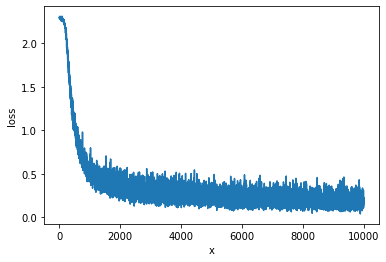

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, len(train_loss_list), 1)
plt.xlabel('x')
plt.ylabel('loss')
plt.plot(x, train_loss_list)
plt.show()

훈련 데이터 정확도와 시험 데이터 정확도 시각화하기

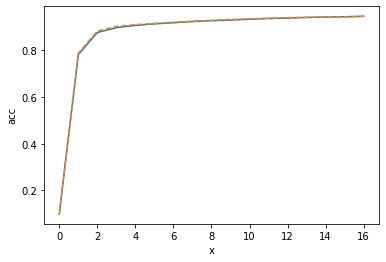

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, len(train_acc_list), 1)
plt.xlabel('x')
plt.ylabel('acc')
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list, linestyle='--')
plt.show()

위 그래프를 보면 시험 데이터 셋이 훈련 데이터 셋과 정확도가 비슷하여 오버피팅이 되지 않았다고 볼 수 있다.